### Installing Required Libraries

In [ ]:
# Library needed to read the PDF file containing conference proceedings
!pip install PyPDF2

# Library needed for text pre-processing
!pip install nltk

# Libraries needed for generating word cloud (Exploratory Data Analysis of the pre-processed tokens)
!pip install wordcloud
!pip install matplotlib

# Installing GenSim- a python-based open-source framework for unsupervised topic modeling and natural language processing
!pip install gensim

# Installing Regular Expressions (RegEx) library
# RegEx is a sequence of characters that forms a search pattern. RegEx are used to match strings of text such
#as particular characters, words, or patterns of characters.
!pip install regex

# Installing the pyldavis library for visualization
!pip install pyldavis

### Importing Libraries

In [18]:
# Importing function to read PDF file contents
from PyPDF2 import PdfFileReader

# Importing functions needed to handle regular expressions, tokenize text (sentence & word), remove stopwords,punctuations and lemmatize (Text Pre-processing)
import re
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer



# Importing POS tags function of NLTK
from nltk import pos_tag

# Importing Functions for Generating Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Importing functions needed for topic modelling
import gensim
from gensim import corpora

# Importing functions needed to perform model evaluation
from gensim.models import CoherenceModel

#Importing function for topic model visualization
import pyLDAvis.gensim_models

### Reading the PDF File and Extracting Text

In [3]:
filename = 'INFORMS_merged.pdf'
pdfFileObj = open(filename,'rb')
pdfReader = PdfFileReader(pdfFileObj,strict=False)

In [4]:
# Getting the number of pages in the file and Initializing a count object
num_pages = pdfReader.numPages 
print(num_pages)

1437


In [5]:
count = 0
text = '''  '''

# Creation of loop to read all pages of the PDF file
while count < num_pages:
    pageObj = pdfReader.getPage(count)
    count +=1
    text += pageObj.extractText()
    

### Text Preprocessing -Tokenization(Using NLTK Tokenizer), Extraction of Alphabetic Characters, Lower Casing of Text etc.

In [6]:
# Performing Word Tokenization
tokens= word_tokenize(text)
type(tokens)
len(tokens)
#print(tokens)

# Alternative Way to Tokenize 
#tokens= text.split()


1250917

In [7]:
#Extracting Alphabets only from Tokens
alphabetic_only = [word for word in tokens if word.isalpha()]
#print(alphabetic_only)

In [8]:
# Converting alphabet_only tokens to lower case
lower_case_tokens = [word.lower() for word in alphabetic_only]
#print(lower_case_tokens)
print(len(lower_case_tokens))

1012177


In [9]:
# Removal of stopwords
exclude = set(string.punctuation)
#print(exclude)

stop = set(stopwords.words('english'))
print(stop)

# Extracting Tokens Without Stopwords
tokens_without_stopwords = [word for word in lower_case_tokens if word not in stop]
#print(tokens_without_stopwords)
print(len(tokens_without_stopwords))
type(tokens_without_stopwords)

In [ ]:
print(exclude)

In [11]:
# Removal of numeric characters ( Fun fact: use of ".extend" and ".append")

stopwords_num_free_tokens =[]
        
        
stopwords_num_free_tokens.extend(str(j) for j in tokens_without_stopwords if not j.isdigit())  
#print(stopwords_num_free_tokens)
print(len(stopwords_num_free_tokens))
        

656705


In [12]:
# Removal of Punctuations

punc_free_tokens=[]
punc_free_tokens.extend(k for k in stopwords_num_free_tokens if k not in exclude)

print(len(punc_free_tokens))
#print(punc_free_tokens)

656705


In [13]:
# Lemmatization
lemmatizer= WordNetLemmatizer()

lemma = [lemmatizer.lemmatize (t) for t in punc_free_tokens]

#print(lemma)
print(len(lemma))
type(lemma)

656705


list

In [32]:
# Removal of Observed Irrelevant High-Frequency Words
common_word = ['informs','session','annual','chair']
lemma= [word for word in lemma if word not in common_word]

### Creation of a gensim corpus Using the Lemmatized Strings

In [33]:
#  splitting each element in lemma (list) to create an array needed by the dictionary 
#(without this an error "doc2bow expects an array of unicode tokens on input, not a single string") will be generated.
lemma_array = [item.split() for item in lemma]


# Alternative way to split strings in the lemma
#lemma_array= [item.split('-') for item in lemma]

In [34]:
# Defining the dictionary of corpus(words); all unique terms are assigned an index
dictionary = corpora.Dictionary(lemma_array)

# The corpus = lemma_array

# Converting tokenized and cleaned text into bag of words vectors/Generation of Document Term Matrix using the dictionary
corpus = [dictionary.doc2bow(text) for text in lemma_array]

# Printing corpus and dictionary
# dictionary.token2id 
#corpus
#print (dictionary)

#for j in dictionary.values():
    #print(j)

### Exploratory Data Analysis of Pre-Processed Tokens -Word Cloud

<class 'str'>


C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wo

C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation i

C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\an

C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\ogunl\an

C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation i

C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ogunl\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)


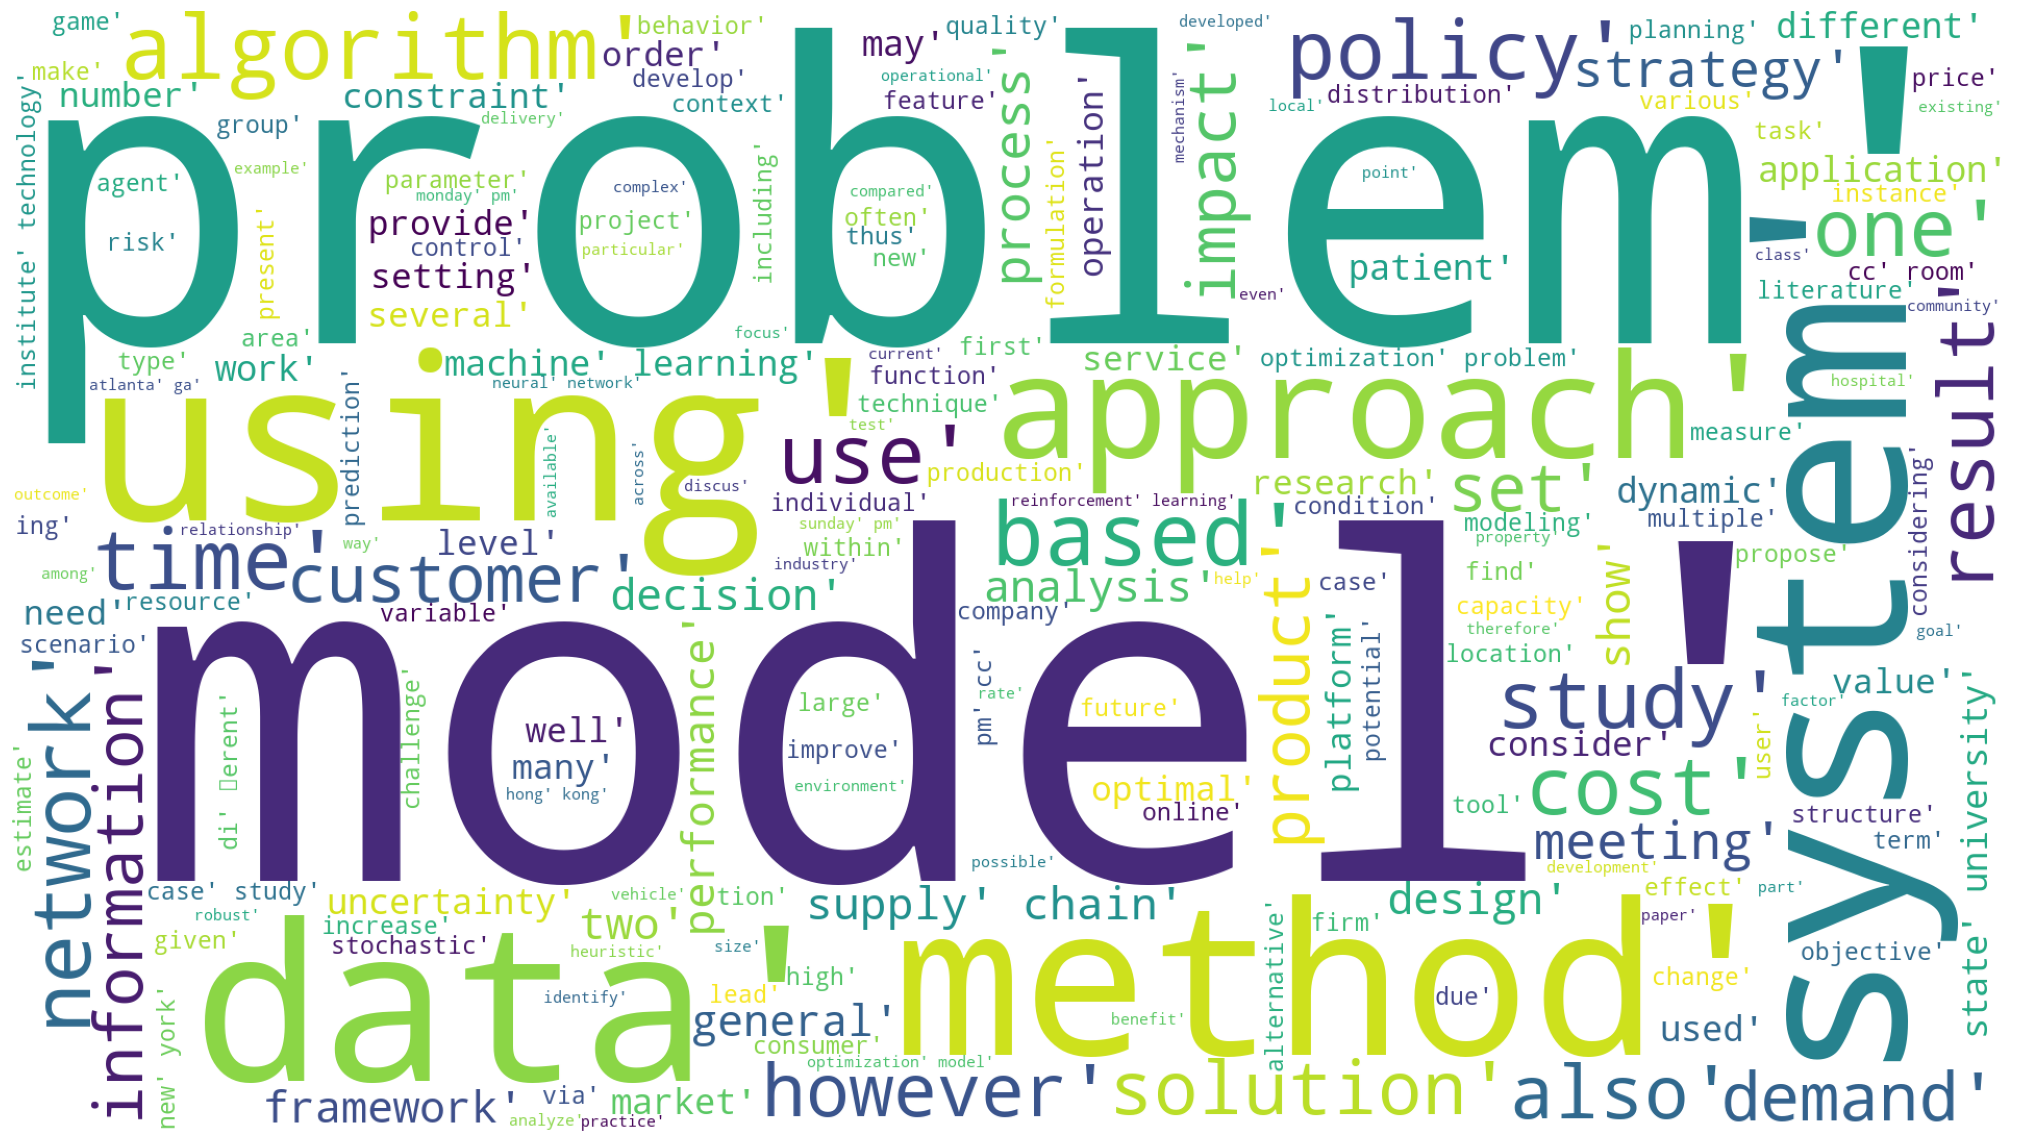

In [35]:
data_tokens=str(lemma_array) 
print(type(data_tokens))
wordcloud = WordCloud(width = 1920, height = 1080, 
                background_color ='white',  
                min_font_size = 12).generate(data_tokens) 

plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Topic Modelling Using Latent Dirichlet Allocation (LDA) Model with gensim

In [36]:
# Define a LDA model with 3 topics: Training the LDA model on document term matrix 
#ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=100)

# Define a LDA model with 4 topics: Training the LDA model on document term matrix 
#ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word=dictionary, passes=100)

# Define a LDA model with 4 topics: Training the LDA model on document term matrix
ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=4, random_state=100, update_every=1, chunksize=200,passes=80, alpha='auto',per_word_topics=True)

# Define a LDA model with 5 topics : Training the LDA model on document term matrix
#ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=100)

In [37]:
#Printing the four topics from the model with weightings of the top 10 keywords contributing to each topic
topics = ldamodel.print_topics(num_words=10)
# Print the results
for topic in topics:
    print(topic)

(0, '0.029*"optimization" + 0.029*"solution" + 0.018*"market" + 0.017*"data" + 0.017*"planning" + 0.016*"method" + 0.011*"constraint" + 0.009*"research" + 0.009*"case" + 0.009*"uncertainty"')
(1, '0.035*"model" + 0.020*"energy" + 0.017*"algorithm" + 0.015*"decision" + 0.014*"result" + 0.013*"cost" + 0.012*"based" + 0.011*"set" + 0.010*"one" + 0.010*"production"')
(2, '0.058*"problem" + 0.025*"system" + 0.024*"time" + 0.015*"different" + 0.014*"using" + 0.011*"demand" + 0.010*"price" + 0.009*"new" + 0.008*"strategy" + 0.008*"well"')
(3, '0.025*"approach" + 0.015*"stream" + 0.015*"study" + 0.014*"optimal" + 0.014*"show" + 0.012*"network" + 0.011*"design" + 0.011*"two" + 0.010*"process" + 0.010*"resource"')


### Evaluating The LDA Topic Model By Computing Model Perplexity and Coherence Scores

In [38]:
# Computing Perplexity : a measure of how good the model is. The lower the perplexity,the better the model is.
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  

# Computing Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=lemma_array, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.635394138096228

Coherence Score:  0.8113663159844713


### Visualizing the Topics

In [42]:
lda_display= pyLDAvis.gensim_models.prepare(ldamodel,corpus,dictionary,sort_topics=False)

pyLDAvis.display(lda_display)

### Visualizing The Relationship Between Number of Topics Extracted and Quality of Topic Model (Coherence)

In [28]:
coherence_values = []
model_list = []

for i in range(1,6,1):
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary, passes=80,random_state=100,update_every=1, chunksize=200,alpha='auto',per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=lemma_array, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        #print(coherence_values)
        #print(model_list)

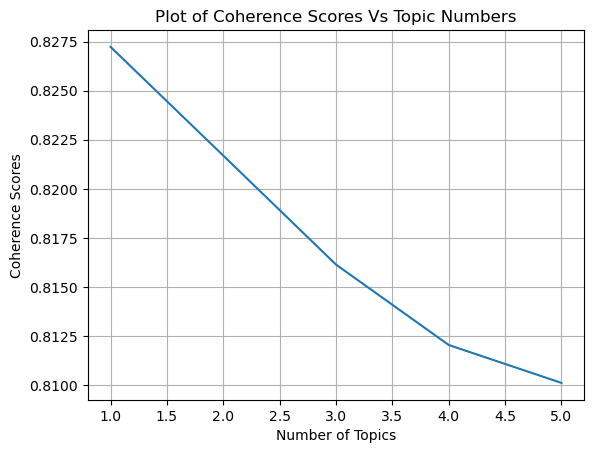

In [29]:
x=range(1,6,1)               
plt.plot(x, coherence_values) 
plt.title('Plot of Coherence Scores Vs Topic Numbers')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.grid(True)
plt.show()

### Assessing the Dominant Topics in The Documents

In [30]:
# Generating the topic associated with each document
count = 0 
for k in ldamodel[corpus]: 
    print("doc : ",count,k) 
    count += 1 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=69f4f169-8014-4ed3-8b68-7cae4197e215' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>